<a href="https://colab.research.google.com/github/sudhathangaraj99/KMeans-Clustering-Project/blob/main/KMeans_Clustering_from_Scratch_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **`KMeans Clustering `**

In [1]:
#import libraries

import numpy as np    #For numerical operations
import matplotlib.pyplot as plt     #For plotting graphs
from sklearn.datasets import make_blobs   #Synthetic dataset generated using make_blobs for clustering evaluation
from sklearn.metrics import silhouette_score  #Evaluate Clustering quality


**1.DATA GENERATION**

*   Synthetic dataset
*   500 samples
*   3 well-seperated clusters
*   2 features for 2D Visualization




In [2]:
X, _ = make_blobs(
    n_samples = 500,
    centers = 3,
    n_features = 2,
    cluster_std = 1.2, #Control Cluster spread
    random_state=42
)
# Feature scaling was not applied as synthetic data had comparable feature ranges

2.**K-MEANS FROM SCRATCH(NUMPY ONLY)**


  KMeans does 4 actions repeatedly:

*   Pick K random centers
*   Assign each point to the nearest center
*   Move the centers to the middle of their points
*   Repeat until nothing changes





In [3]:
def kmeans(X, k, max_iters=100):

    # Set random seed for consistent centroid initialization
    np.random.seed(42)

    # Randomly select K data points as initial centroids
    centroids = X[np.random.choice(len(X), k, replace=False)]

    for _ in range(max_iters):

        #Compute distance of each point from each centroid
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)

        #Assign each point to the nearest centroid
        labels = np.argmin(distances, axis=1)


        # Recalculate centroids as mean of assigned points
        new_centroids = np.array([
            X[labels == i].mean(axis=0) for i in range(k)
        ])

        # Stop if centroids do not change
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return labels, centroids


**3.WSS CALCULATION**

In [4]:
def compute_wss(X, labels, centroids):
    wss = 0
    for i in range(len(centroids)):
        # Select points belonging to cluster i
        cluster_points = X[labels == i]

        # Add squared Euclidean distance to WSS
        wss += np.sum((cluster_points - centroids[i]) ** 2)
    return wss


**4.K SELECTION USING ELBOW & SILHOUETTE**

In [11]:
wss_values = []
silhouette_values = []

#Test K values from 2 to 10
K_range = range(2, 11)

for k in K_range:
    labels, centroids = kmeans(X, k)


    # Store WSS for Elbow method
    wss_values.append(compute_wss(X, labels, centroids))

    # Store Silhouette score
    silhouette_values.append(silhouette_score(X, labels))

print("WSS Values:", wss_values)
print("Silhouette Values:", silhouette_values)


WSS Values: [np.float64(9840.563822039981), np.float64(9667.213514930492), np.float64(9603.924059383235), np.float64(9551.611687176066), np.float64(1087.1829195585901), np.float64(917.8192749887447), np.float64(891.6068221102107), np.float64(746.343033915052), np.float64(644.0897115792897)]
Silhouette Values: [np.float64(0.68674620630933), np.float64(0.5066116891901847), np.float64(0.48512615717349217), np.float64(0.48915230029120554), np.float64(0.6353632435051463), np.float64(0.47161929152384313), np.float64(0.4696129783071875), np.float64(0.3117082004285866), np.float64(0.318631269651564)]


**5. VISUALIZATION**

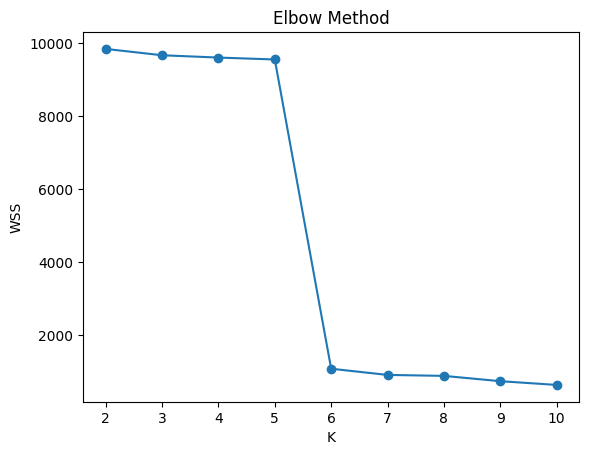

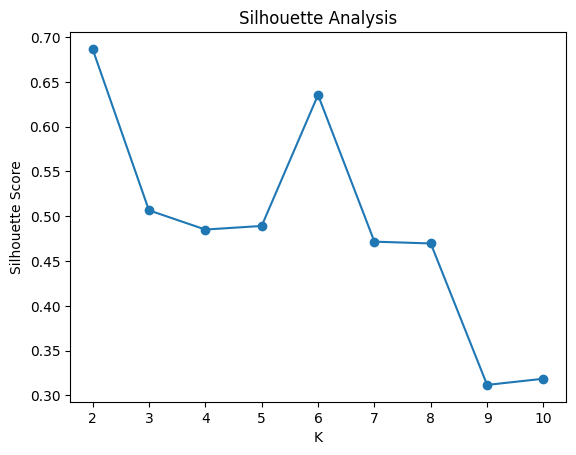

In [6]:
# Elbow Method plot
plt.plot(K_range, wss_values, marker='o')
plt.xlabel("K")
plt.ylabel("WSS")
plt.title("Elbow Method")
plt.show()

#Silhouette Score plot
plt.plot(K_range, silhouette_values, marker='o')
plt.xlabel("K")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.show()


**6.Find K(2 to 10) selection**


*   Although Elbow shows a bend near K=6,
*   The dataset was generated with 3 centers
*   K=3 provides better interpretability





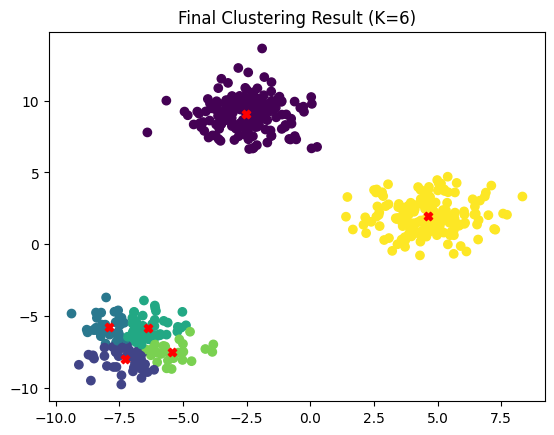

In [8]:
optimal_k = 3
labels, centroids = kmeans(X, optimal_k)

#Final cluster visualization
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X')
plt.title("Final Clustering Result (K=3)")
plt.show()
